In [1]:
import numpy as np
import keras
from keras import layers
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential ,Model
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization  ,Activation ,GlobalMaxPooling2D
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Project_DeepLearning/

Mounted at /content/drive
/content/drive/MyDrive/Project_DeepLearning


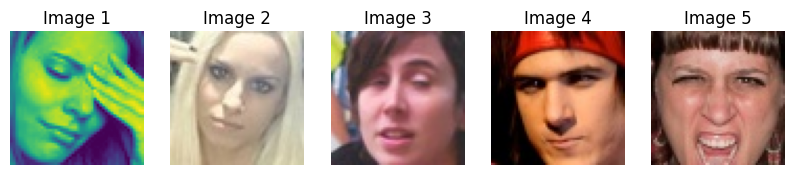

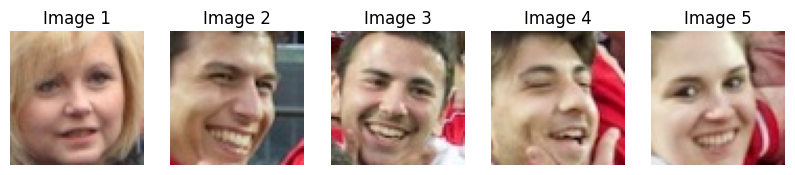

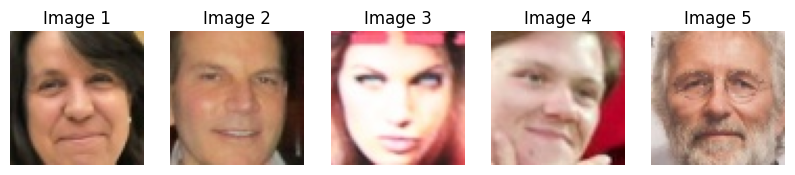

In [3]:


# Đường dẫn đến các thư mục chứa ảnh
folder_paths = ["./FER_Custom_Dataset/Disappointed", "./FER_Custom_Dataset/interested", "./FER_Custom_Dataset/neutral"]

# Hiển thị một số mẫu từ mỗi thư mục
num_samples = 5

for folder_path in folder_paths:
    # Lấy danh sách tệp tin trong thư mục
    image_files = os.listdir(folder_path)
    # Chọn ngẫu nhiên num_samples mẫu từ thư mục
    selected_images = [os.path.join(folder_path, img) for img in image_files[:num_samples]]

    # Hiển thị ảnh
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.show()

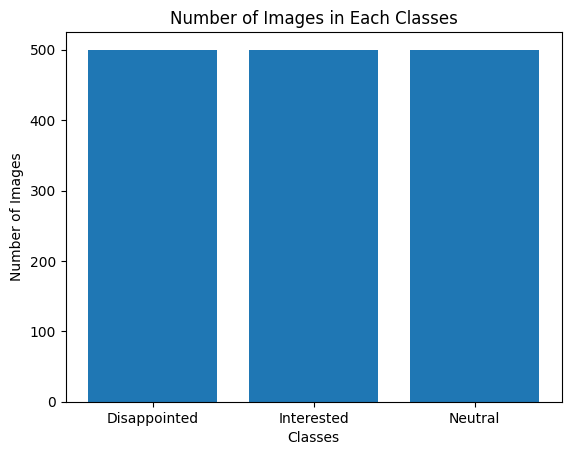

In [4]:
num_images = [len(os.listdir(folder_path)) for folder_path in folder_paths]
labels = ["Disappointed", "Interested", "Neutral"]

# Vẽ biểu đồ cột
plt.bar(labels, num_images)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Classes')
plt.show()

In [5]:
# extract_folder_path  = "/content/drive/MyDrive/Project_DeepLearning/"
# zip_file_path = './FER_Custom_Dataset.zip'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_folder_path)

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)


In [7]:
width = 64
height = 64
batch_size = 128
train_generator = datagen.flow_from_directory(
    './FER_Custom_Dataset',
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 1200 images belonging to 3 classes.


In [8]:
test_generator = datagen.flow_from_directory(
    './FER_Custom_Dataset',
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 300 images belonging to 3 classes.


In [9]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16, 16))
# for X_batch, y_batch in train_generator:
#     for i in range(0, 16):
#         plt.subplot(4,4,i+1)
#         plt.imshow(X_batch[i])
#     plt.show()
#     break

In [23]:
input_shape = (64, 64, 3)
kernel_size = (3, 3)
num_classes = 3

model = Sequential([
    Conv2D(32, kernel_size=kernel_size, padding="valid", activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=kernel_size, padding="valid", activation='relu'),
    MaxPooling2D(2),
    Conv2D(32, kernel_size=kernel_size, padding="valid",activation='relu', strides=1),
    Conv2D(32, kernel_size=kernel_size, padding="valid",activation='relu', strides=1),
    MaxPooling2D(2),
    Conv2D(512, kernel_size=kernel_size, padding="valid",activation='relu', strides=1),
    Conv2D(512, kernel_size=kernel_size, padding="valid",activation='relu', strides=1),
    MaxPooling2D(2),
    Flatten(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.summary()
model.save('Sequence_6.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                

In [29]:
from tensorflow.keras.models import load_model

model = load_model('Sequence_4.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_24 (Ba  (None, 64, 64, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 128)      

In [24]:
batch_size = 128
epochs = 25

model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit(train_generator,validation_data=test_generator,epochs=epochs,batch_size=batch_size,verbose=1)

Epoch 1/25
10/10 [==============================] - 68s 6s/step - loss: 1.1129 - accuracy: 0.3325 - val_loss: 1.0958 - val_accuracy: 0.3333
Epoch 2/25
10/10 [==============================] - 60s 6s/step - loss: 1.0389 - accuracy: 0.4608 - val_loss: 1.2876 - val_accuracy: 0.3567
Epoch 3/25
10/10 [==============================] - 60s 6s/step - loss: 0.9383 - accuracy: 0.4992 - val_loss: 1.1567 - val_accuracy: 0.3933
Epoch 4/25
10/10 [==============================] - 58s 6s/step - loss: 0.9429 - accuracy: 0.5200 - val_loss: 1.0907 - val_accuracy: 0.4000
Epoch 5/25
10/10 [==============================] - 59s 6s/step - loss: 0.9315 - accuracy: 0.5133 - val_loss: 1.1699 - val_accuracy: 0.3633
Epoch 6/25
10/10 [==============================] - 58s 6s/step - loss: 0.9050 - accuracy: 0.5217 - val_loss: 1.1498 - val_accuracy: 0.3633
Epoch 7/25
10/10 [==============================] - 59s 6s/step - loss: 0.9197 - accuracy: 0.5458 - val_loss: 1.1330 - val_accuracy: 0.3633
Epoch 8/25
10/10 [==

In [25]:
score = model.evaluate(test_generator, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

3/3 [==============================] - 6s 1s/step - loss: 1.1756 - accuracy: 0.3800
Test loss: 1.1755757331848145
Test accuracy: 0.3799999952316284


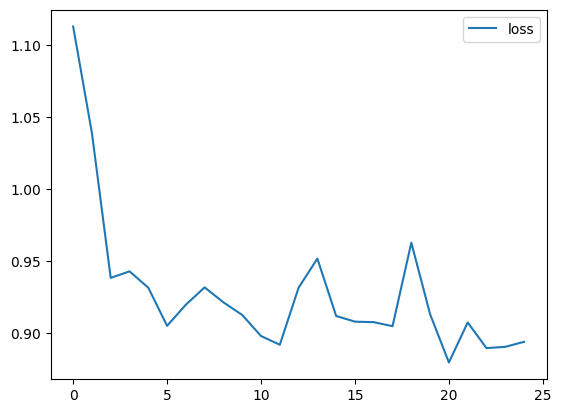

In [26]:
import matplotlib.pyplot as plt
metrics = history.history
plt.plot(history.epoch, metrics['loss'])
plt.legend(['loss'])
plt.show()

In [27]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_generator)

y_test = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

3/3 [==============================] - 4s 845ms/step
              precision    recall  f1-score   support

           0       0.31      0.08      0.13       100
           1       0.39      0.79      0.52       100
           2       0.36      0.25      0.30       100

    accuracy                           0.37       300
   macro avg       0.35      0.37      0.31       300
weighted avg       0.35      0.37      0.31       300



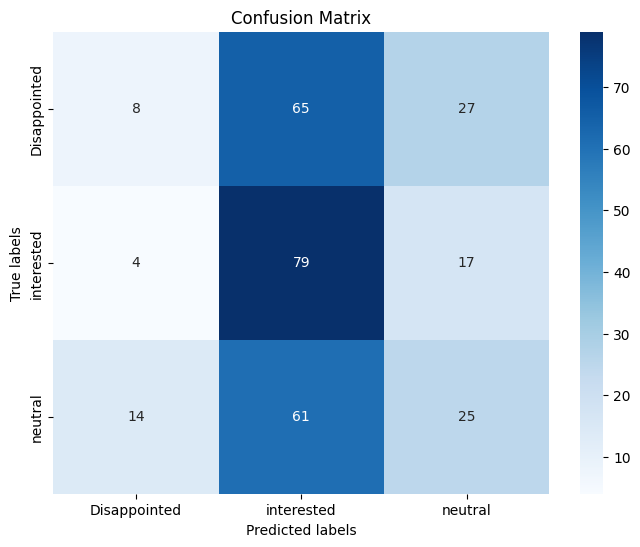

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_generator.classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()